# Assignment 1 The Mandelbrot set


The Mandelbrot set is a 2D set for wicht the function is $$F_c(z)=z^2+c$$. It does not diverge to infinity when iterated starting at $z=0$, for complex numbers $c$. When we have $z_0$ as the first number, we then find $z_1=f_c(z_0)$, $z_2=f_c(z_1),...,z_n=f_c(z_{n-1})$, we can rewrite this as $$z_{n+1}=z_n^2 +c.$$

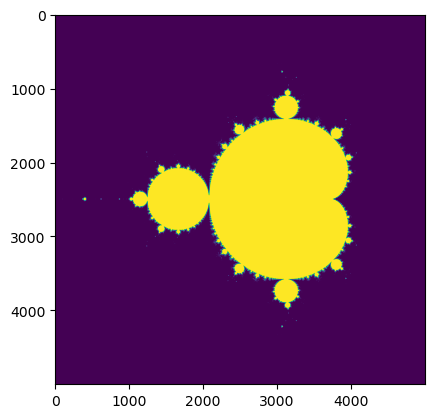

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def mandelbrot(z_n, c):
    return z_n**2 + c


def mandelbrot_set(c):
    z_n = 0
    for i in range(100):
        z_n = mandelbrot(z_n, c)
        if abs(z_n) > 2:
            return False
    return True


def mandelbrot_set_image(xmin, xmax, ymin, ymax, width, height):
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    image = np.zeros((height, width))
    for i in range(width):
        for j in range(height):
            image[j, i] = mandelbrot_set(complex(x[i], y[j]))
    return image


def plot_mandelbrot_set(xmin, xmax, ymin, ymax, width, height):
    image = mandelbrot_set_image(xmin, xmax, ymin, ymax, width, height)
    plt.imshow(image)
    plt.show()


plot_mandelbrot_set(-2, 1, -1.5, 1.5, 5000, 5000)